In [8]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

### Target functions

In [15]:
def one_max(x):
    return x.sum()

def leading_ones(x):
    is_one = x == 1
    if all(is_one):
        return len(x)
    return np.argmin(is_one)

def jump(x, k=3):
    sum_ = x.sum()
    if len(x) == sum_:
        return len(x)
    return min(len(x) - k, sum_)

def bin_val(x):
    val = 0
    for bit in x:
        val = (val << 1) | bit
    return val

def royal_roads(x, k=5):
    # assert len(x) % k == 0, 'n must be divisible by k'
    return np.sum(np.sum(np.split(x, len(x) / k), axis=1) == k)

def is_max(x):
    # Return if x is the maximal possible value
    return x.sum() == len(x)

### Optimization functions ("evolutionary algorithms")

Algorithm 1: RLS

    1 Choose x uniformly at random from {0, 1}^n;
    2 while stopping criterion not met do
    3   y ← x;
    4   Choose i uniformly at random from {1, . . . , n};
    5   yi ← (1 − yi);
    6   if f(y) ≥ f(x) then x ← y;

In [10]:
def rls(n, target_func, only_greater=False):
    x = np.random.randint(0, 2, n)
    steps = 0
    while not is_max(x):
        y = x.copy()
        idx = np.random.randint(len(y))
        y[idx] = not y[idx]
        if (target_func(y) > target_func(x) or
                (not only_greater and target_func(y) == target_func(x))):
            x = y
        steps += 1
    return steps

In [11]:
def oneOneEA(n, target_func, only_greater=False):
    x = np.random.randint(0, 2, n)
    steps = 0
    negate = np.vectorize(lambda x: not x)
    while not is_max(x):
        y = x.copy()
        probabilities = np.random.binomial(1, 1/n, n)
        y = probabilities * negate(y) + negate(probabilities) * y 
        if (target_func(y) > target_func(x) or
                (not only_greater and target_func(y) == target_func(x))):
            x = y
        steps += 1
    return steps

In [12]:
# TODO: random TIE BREAKING
def make_oneLambdaEA(populationSize):
    def oneLambdaEA(n, target_func, only_greater=False):
        x = np.random.randint(0, 2, n)
        steps = 0
        negate = np.vectorize(lambda x: not x)
        population = np.empty(populationSize)
        while not is_max(x):
            probabilities = np.random.binomial(1, 1/n, [populationSize, n])
            population = np.tile(x, (populationSize, 1))
            population = population * negate(probabilities) + negate(population) * probabilities
            popResults = np.apply_along_axis(target_func, 1, population)
            maxIndex = np.argmax(popResults) # TODO: TIE BREAKING
            if (popResults[maxIndex] > target_func(x) or
                    (not only_greater and popResults[maxIndex] == target_func(x))):
                x = population[maxIndex]
            steps += 1
        return steps
    return oneLambdaEA

### Evaluation

In [13]:
def evaluate(n, opt_func, problem, only_greater=False):
    problem_runtimes = np.empty(10)
    for i in range(10):
        problem_runtimes[i] = opt_func(n, problem, only_greater)
    return problem_runtimes

def evaluate_problem(ns, opt_func, problem, ax, only_greater=False):
    problems_runtimes = np.empty((len(ns), 10))
    for i, n in enumerate(ns):
        problems_runtimes[i] = evaluate(n, opt_func, problem, only_greater)
        print(".", end="")
    print("")
    ax.plot(problems_runtimes.mean(axis=1), label=problem.__name__)
    return problems_runtimes

def evaluate_algorithm(ns, opt_func, title, problems, ax, only_greater=False):
    # One optimizing algorithm which gets executed on all given problems
    algorithm_runtimes = np.empty((len(problems), len(ns), 10))
    for i, p in enumerate(problems):
        algorithm_runtimes[i] = evaluate_problem(ns, opt_func, p, ax, only_greater)
    # Plotting settings
    if len(ns) > 40:
        # Only show each 20th tick on the x axis
        plt.xticks(np.arange(0, len(ns), len(ns) // 20), ns[::len(ns) // 20])
    else:
        plt.xticks(np.arange(0, len(ns)), ns)
    ax.set_xlabel('n')
    ax.set_ylabel('Steps')
    ax.set_title(title)
    ax.set_yscale('log')
    ax.legend()
    return algorithm_runtimes

def evaluate_all(ns, algos, problems, only_greater=False):
    filename = "{} - {}".format(ns[-1], "g" if only_greater else "ge")
    # All optimizing algorithm are executed on all given problems
    fig, axes = plt.subplots(len(algos), 1, figsize=(16, 8 * len(algos)))
    # Hotfix to make "axes.flat" work for only one algorithm
    if len(algos) == 1:
        axes = np.array([axes])
    for algo, ax in zip(algos, axes.flat):
        evaluate_algorithm(ns, algo, '{} - {}'.format(filename, algo.__name__),
                           problems, ax, only_greater)
    # Contains n and the only_greater flag
    fig.savefig("{}.pdf".format(filename))

..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
CPU times: user 1min 41s, sys: 526 ms, total: 1min 42s
Wall time: 1min 42s


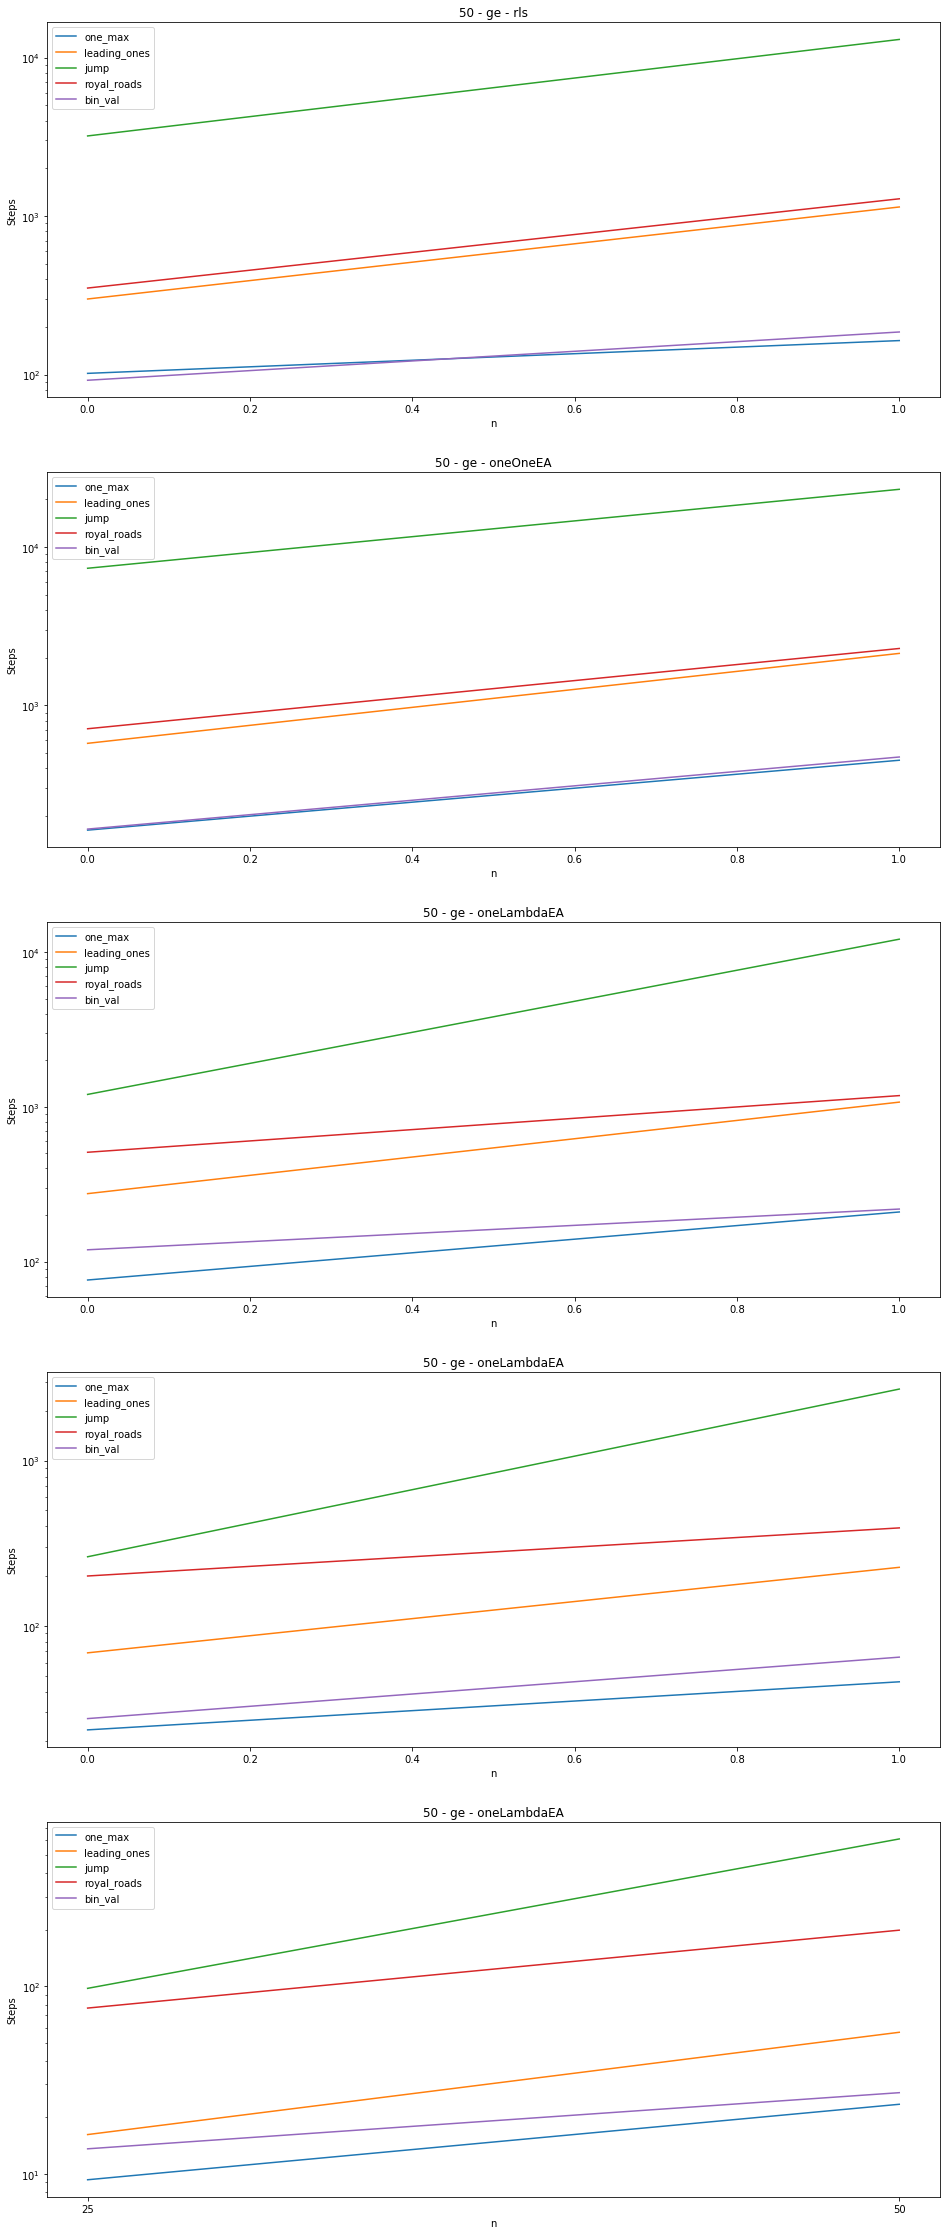

In [16]:
algorithms = (rls, oneOneEA, make_oneLambdaEA(2), make_oneLambdaEA(10), make_oneLambdaEA(50))
problems = (one_max, leading_ones, jump, royal_roads, bin_val)
%time evaluate_all(np.arange(25, 201, 25), algorithms, problems, only_greater=False)

In [ ]:
%time evaluate_all(np.arange(25, 201, 25), algorithms, problems, only_greater=True)

........
........


### Analysis

##### 1.) Random Local Search
**TODO:**

##### 2.) Evolutionary Algorithm - (1+1)-EA
**TODO:**

##### 3.) Evolutionary Algorithm - (1+$\lambda$)-EA
**TODO:**
